In [72]:
# 텍스트 데이터를 처리합니다.
from konlpy.tag import Okt
import collections

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from gensim.models import word2vec

font_path = r'./wordcloud/AppleMyungjo.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

korean_word = []
korean_pos = []

korean = Okt()

def __array__(self):
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

In [73]:
korean_reg = korean.pos("지금 립 못구하나용 ㅠㅠ저거랑 비슷한 립 있나용?", norm=True, stem=True)

# Noun : 명사
# Modifier : 수식어
# Korean Particle : 파편어
# Determiner : 한정사
# Josa : 조사
# Adjective : 형용사
# Punctuation : 문장 부호

for word in range( len(korean_reg) ) :
    korean_word.append( korean_reg[word][0] )
    korean_pos.append( korean_reg[word][1] )

In [74]:
# 빈도 확인
collections.Counter(korean_word)
# collections.Counter(korean_pos)

Counter({'지금': 1,
         '립': 2,
         '못': 1,
         '구': 1,
         '하나': 1,
         '용': 1,
         'ㅠㅠ': 1,
         '저': 1,
         '거': 1,
         '랑': 1,
         '비슷하다': 1,
         '있다': 1,
         '?': 1})

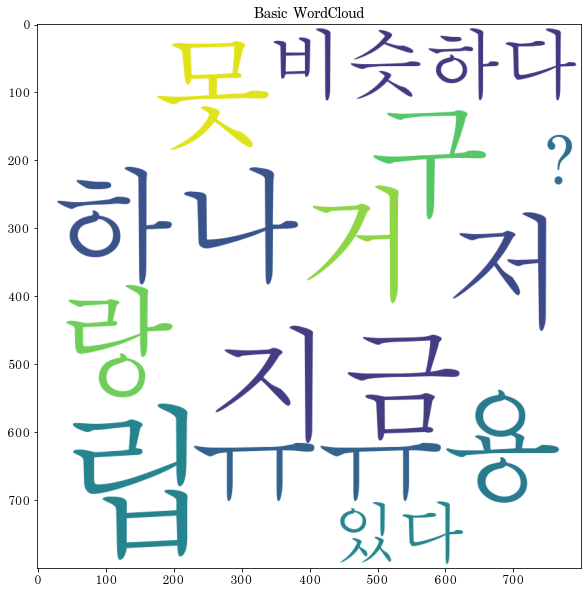

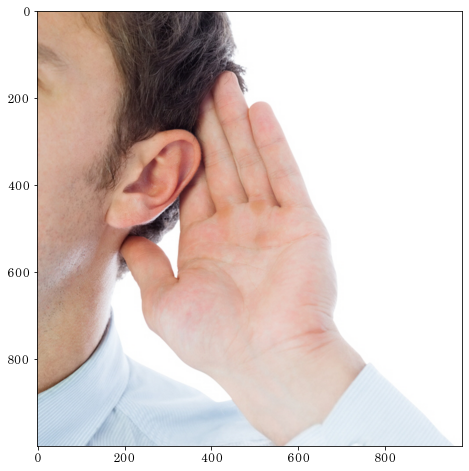

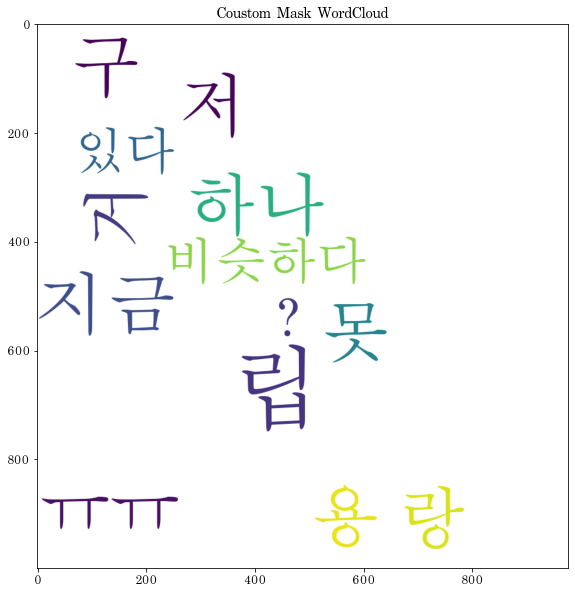

In [75]:
# 기본 워드클라우드
wordcloud = WordCloud(
    font_path = "/wordcloud/AppleMyungjo.ttf",
    width = 800,
    height = 800,
    background_color="white"
)

wordcloud = wordcloud.generate_from_frequencies(collections.Counter(korean_word))

images = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.to_array())
plt.title("Basic WordCloud")
plt.show()
images.savefig('./wordcloud/wc_1.png', dpi = 500)


# 기본 워드클라우드에 마스킹 할 이미지
plt.figure(figsize=(8,8))
plt.imshow(np.array(Image.open('./wordcloud/voc.jpg')))
plt.show()

# 원하는 이미지의 형태로 마스킹 된 워드 클라우드
images_mask = np.array(Image.open('./wordcloud/voc.jpg'))

wc_mask = WordCloud(
    font_path = "/wordcloud/AppleMyungjo.ttf",
    mask = images_mask,
    background_color = "white"
).generate_from_frequencies(collections.Counter(korean_word))

images = plt.figure(figsize=(10, 10))
plt.imshow(wc_mask)
plt.title("Coustom Mask WordCloud")
plt.show()
images.savefig('./wordcloud/wc_2.png', dpi = 500)

In [76]:
# Word2Vec 으로 텍스트 마이닝
text_mining = []

for i in "지금 립 못구하나용 ㅠㅠ저거랑 비슷한 립 있나용?".split("\r\n") :
    lists = korean.pos(i, norm = True, stem = True)
    save = []
    
    for j in lists :
        if not j[1] in ["Josa", "Eomi", "Punctuation"] :
            save.append( j[0] )
    save_complete = (" ".join(save)).strip()
    text_mining.append( save_complete )
    
with open('text_mining.wakati', 'w', encoding = 'utf-8') as fp :
    fp.write('\n'.join(text_mining))

In [77]:
text_mining_model = word2vec.Word2Vec( word2vec.LineSentence('text_mining.wakati'), size = 100, window = 1, min_count = 1, hs = 1, sg = 1 )
text_mining_model.save( 'word2vec_wakati.model' )

<ipython-input-79-2fbefc56b075>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  text_pos_labels = [ i[0] for i in text_detect_model.most_similar(positive = ["립"]) ]
<ipython-input-79-2fbefc56b075>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  text_pos_values = [ i[1] for i in text_detect_model.most_similar(positive = ["립"]) ]


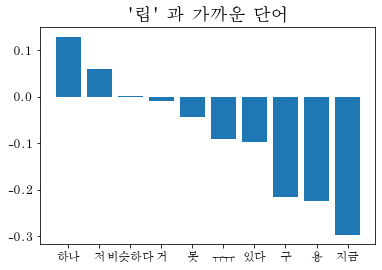

<Figure size 720x720 with 0 Axes>

In [79]:
# 거리 의미 : 단어상 유사 거리가 아닌, 의미상 상관 거리
text_detect_model = word2vec.Word2Vec.load('./word2vec_wakati.model')

text_pos_labels = [ i[0] for i in text_detect_model.most_similar(positive = ["립"]) ]
text_pos_values = [ i[1] for i in text_detect_model.most_similar(positive = ["립"]) ]

font_path = r'./wordcloud/AppleMyungjo.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

plt.bar(text_pos_labels, text_pos_values)
plt.title("'립' 과 가까운 단어", fontproperties = fontprop)
plt.figure(figsize=(10,10))
plt.show()

<ipython-input-81-6ce9f8a73aea>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  text_pos_labels = [ i[0] for i in text_detect_model.most_similar(negative = ["립"]) ]
<ipython-input-81-6ce9f8a73aea>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  text_pos_values = [ i[1] for i in text_detect_model.most_similar(negative = ["립"]) ]


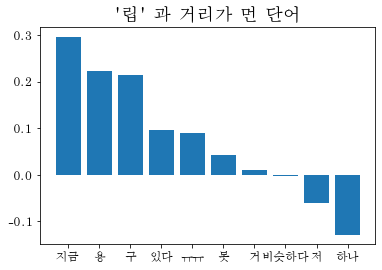

<Figure size 720x720 with 0 Axes>

In [81]:
text_detect_model = word2vec.Word2Vec.load('./word2vec_wakati.model')

text_pos_labels = [ i[0] for i in text_detect_model.most_similar(negative = ["립"]) ]
text_pos_values = [ i[1] for i in text_detect_model.most_similar(negative = ["립"]) ]

font_path = r'./wordcloud/AppleMyungjo.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

plt.bar(text_pos_labels, text_pos_values)
plt.title("'립' 과 거리가 먼 단어", fontproperties = fontprop)
plt.figure(figsize=(10,10))
plt.show()

<ipython-input-82-bc0ec047338e>:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  text_pos_labels = [ i[0] for i in text_detect_model.most_similar(negative = ["립"], positive = ["비슷하다"]) ]
<ipython-input-82-bc0ec047338e>:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  text_pos_values = [ i[1] for i in text_detect_model.most_similar(negative = ["립"], positive = ["비슷하다"]) ]


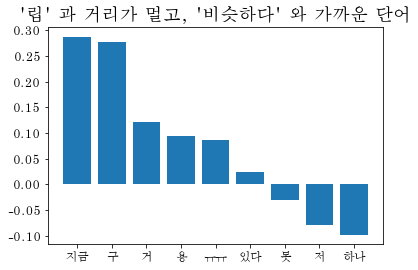

<Figure size 720x720 with 0 Axes>

In [82]:
text_detect_model = word2vec.Word2Vec.load('./word2vec_wakati.model')

text_pos_labels = [ i[0] for i in text_detect_model.most_similar(negative = ["립"], positive = ["비슷하다"]) ]
text_pos_values = [ i[1] for i in text_detect_model.most_similar(negative = ["립"], positive = ["비슷하다"]) ]

font_path = r'./wordcloud/AppleMyungjo.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

plt.bar(text_pos_labels, text_pos_values)
plt.title("'립' 과 거리가 멀고, '비슷하다' 와 가까운 단어", fontproperties = fontprop)
plt.figure(figsize=(10,10))
plt.show()